# Домашнее задание по Matplotlib и Seaborn
# Pro

### *Часть 1. Matplotlib*

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris

### **Задача 1**

*2 балла*

Используя библиотеку Matplotlib, для датасета "Ирисы", который подгружается кодом ниже, нарисуйте точечную диаграмму (scatter plot) всех четырех признаков. Каждый признак должен быть нарисован на отдельном графике. Используйте для этого subplot формата 2 на 2. Графики должны быть читаемыми, т. е. отрегулируйте размер subplot'ов. Добавьте названия признаков к каждому графику в качестве имени графика. Используйте метки классов (y) в качестве цветовой разметки. Добавьте расшифровку цветов, соответствующих меткам классов, в качестве лейблов.

P.S. Используйте функцию plt.scatter(x, y, color).

In [2]:
# загружаем датасет ирис
data = load_iris(return_X_y=False)
X = data.data
y = data.target
names = data.target_names

### **Решение:**

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# смотрим рвзмеры
X.shape, y.shape

((150, 4), (150,))

In [4]:
# метки классов по цветкам
y[:50], y[51:100], y[101:150]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2]))

In [5]:
# смотрим названия цветков
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# список стороковых имен
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# Исследование набора данных Iris. описательная статистика в Pandas
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# переименовываем столбцы
iris_df = iris_df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width', 'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'})
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# добавляем столбец с названиями вида каждого цветка
iris_df['flowers'] = [data.target_names[i] for i in data.target]
iris_df.sample(6)

,sepal_length,sepal_width,petal_length,petal_width,flowers
68,6.2,2.2,4.5,1.5,versicolor
129,7.2,3.0,5.8,1.6,virginica
17,5.1,3.5,1.4,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
39,5.1,3.4,1.5,0.2,setosa
72,6.3,2.5,4.9,1.5,versicolor


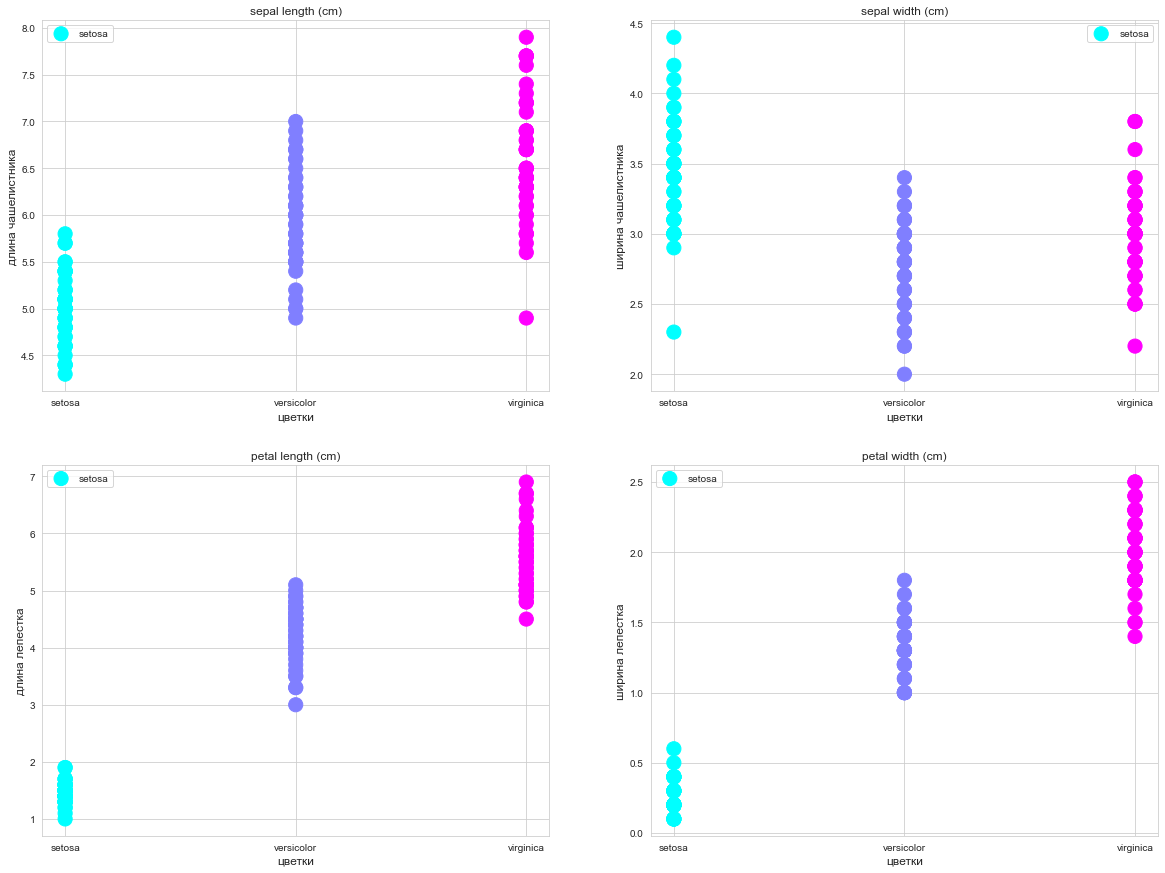

In [99]:
# графики scatter matplotlib
plt.figure(figsize=(20, 15))
plt.subplot(221)


ax_1 = plt.subplot(2, 2, 1)
plt.title('sepal length (cm)')
plt.scatter(x=iris_df.flowers, y=iris_df.sepal_length, s=200, c=y, cmap='cool')
plt.xlabel('цветки', fontsize=12)
plt.ylabel('длина чашелистника', fontsize=12)
plt.legend(names)

ax_2 = plt.subplot(2, 2, 2)
plt.title('sepal width (cm)')
plt.xlabel('цветки', fontsize=12)
plt.ylabel('ширина чашелистника', fontsize=12)
plt.scatter(x=iris_df.flowers, y=iris_df.sepal_width, s=200, c=y, cmap='cool')
plt.legend(names)


ax_3 = plt.subplot(2, 2, 3)
plt.title('petal length (cm)')
plt.scatter(x=iris_df.flowers, y=iris_df.petal_length, s=200, c=y, cmap='cool')
plt.xlabel('цветки', fontsize=12)
plt.ylabel('длина лепестка', fontsize=12)
plt.legend(names)

ax_4 = plt.subplot(2, 2, 4)
plt.title('petal width (cm)')
plt.scatter(x=iris_df.flowers, y=iris_df.petal_width, s=200, c=y, cmap='cool')
plt.xlabel('цветки', fontsize=12)
plt.ylabel('ширина лепестка', fontsize=12)
plt.legend(names)

plt.show()

In [ ]:
# По универу
plt.figure(1, figsize=(10,10))
names_par = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for i in range(4):    
    plt.subplot(2,2,i+1)
    plt.title(names_par[i])
    plt.scatter(range(50), X[:50, i], label=names[0], c='r')
    plt.scatter(range(50,100), X[50:100, i], label=names[1], c='b',)
    plt.scatter(range(100,150), X[100:150, i], label=names[2], c='g')
    plt.xlabel('index')
    plt.ylabel(data.feature_names[i])
    plt.legend()
    


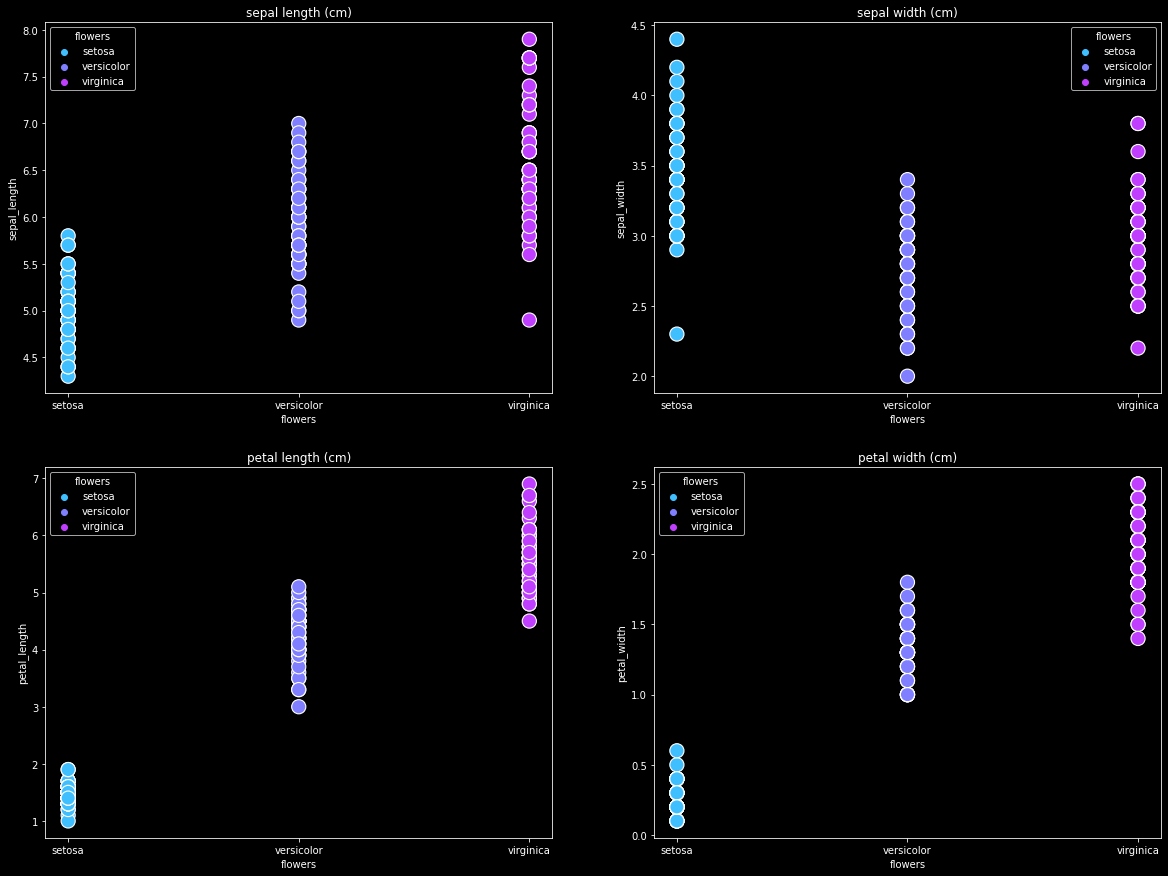

In [20]:
# грфики seaborn. Как-то получше чем matplotlib
plt.figure(figsize=(20, 15))
plt.subplot(221)

ax_1 = plt.subplot(2, 2, 1)
plt.title('sepal length (cm)')
sns.scatterplot(data=iris_df, x=iris_df.flowers, y=iris_df.sepal_length, s=200, hue='flowers', legend='brief', palette='cool')

ax_2 = plt.subplot(2, 2, 2)
plt.title('sepal width (cm)')
sns.scatterplot(data=iris_df, x=iris_df.flowers, y=iris_df.sepal_width, s=200, hue='flowers', legend='brief', palette='cool')

ax_3 = plt.subplot(2, 2, 3)
plt.title('petal length (cm)')
sns.scatterplot(data=iris_df, x=iris_df.flowers, y=iris_df.petal_length, s=200, hue='flowers', legend='brief', palette='cool')

ax_2 = plt.subplot(2, 2, 4)
plt.title('petal width (cm)')
sns.scatterplot(data=iris_df, x=iris_df.flowers, y=iris_df.petal_width, s=200, hue='flowers', legend='brief', palette='cool')

plt.show()

### **Задача 2**

*2 балла*

Используя библиотеку Matplotlib, постройте гистограмму для первого признака в датасете выше следующим образом:
* на одном графике должно быть три гистограммы, по одной на каждый класс,
* для этого используйте методологии подвыборки массива с условием,
* количество бинов должно определяться автоматически (режим "auto"),
* гистограмма должна быть читаемой, т. е. добавьте подписи, лейблы, названия и т. д.

### **Решение:**

In [ ]:
# По универу

plt.hist(X[:50,0])
plt.hist(X[50:100,0], alpha=0.7)
plt.hist(X[100:,0], alpha=0.7)
plt.title('Гистограмма первого признака')
plt.xlabel(data.feature_names[0])
plt.ylabel('количество экземпляров')
plt.legend(names)
plt.show()

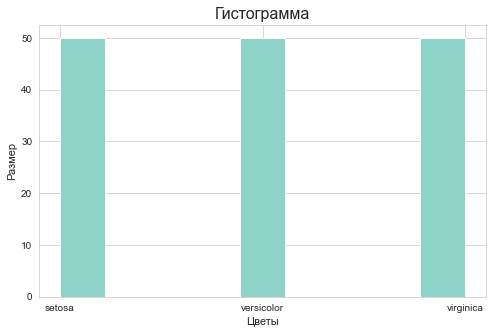

In [91]:
# гистограмму для первого признака в датасете matplotlib
plt.figure(figsize=(8, 5))

plt.hist(iris_df['flowers'], bins='auto')

plt.title('Гистограмма', fontsize=16)
plt.xlabel('Цветы', fontsize=11)
plt.ylabel('Размер', fontsize=11)

plt.show()

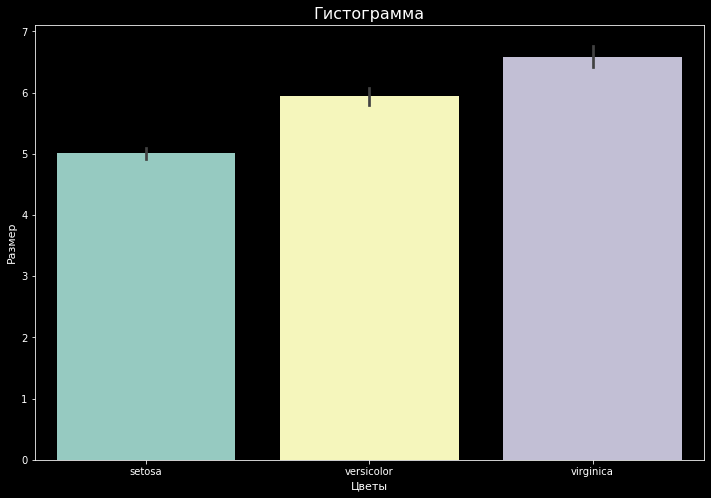

In [16]:
# вариант на seaborn, проще
plt.figure(figsize=(12, 8))

sns.barplot(x=iris_df.flowers, y=iris_df.sepal_length, data=iris_df)
plt.title('Гистограмма', fontsize=16)
plt.xlabel('Цветы', fontsize=11)
plt.ylabel('Размер', fontsize=11)

plt.show()

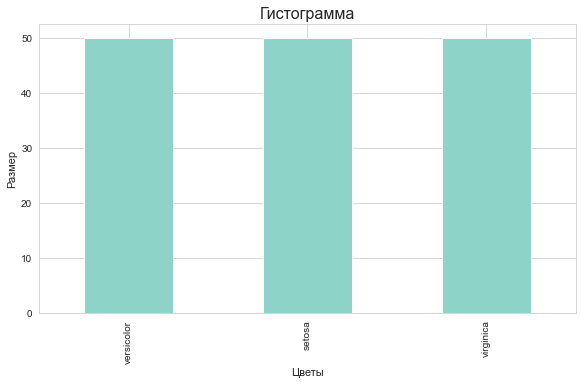

<function matplotlib.pyplot.show(close=None, block=None)>

In [96]:
# еще вариант
plt.figure(figsize=(8, 5))
iris_df['flowers'].value_counts().plot.bar()
plt.tight_layout()
plt.title('Гистограмма', fontsize=16)
plt.xlabel('Цветы', fontsize=11)
plt.ylabel('Размер', fontsize=11)
plt.show()
plt.show

### **Задача 3**

*2 балла*

Используя библиотеку Matplotlib, посчитайте матрицу корреляции между признаками и нарисуйте ее как heatmap. Подберите подходящую по смыслу цветовую гамму. Добавьте названия признаков в качестве тиков по осям. Добавьте отрисовку цветовой шкалы.

### **Решение:**

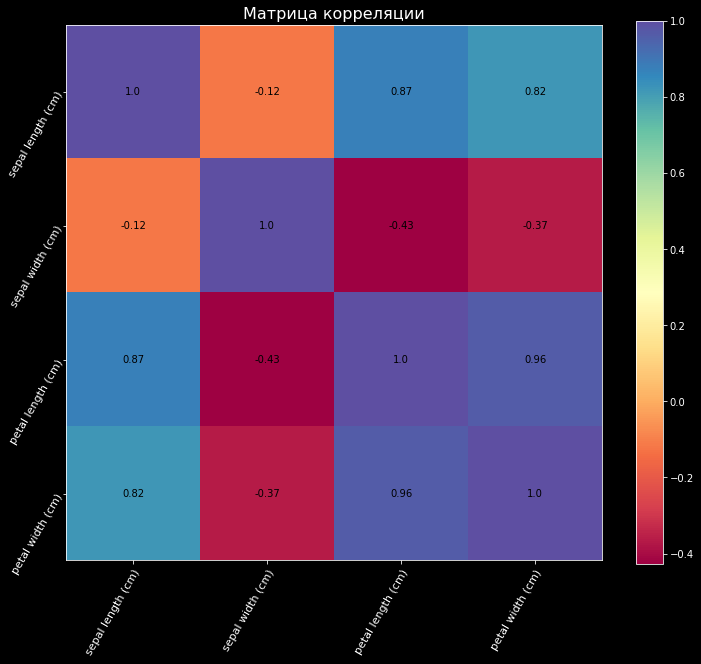

In [186]:
'''тепловой график корреляции matplotlib'''

# создаем матрицу корреляции
corr = iris_df.corr()

#создаем график
fig, ax = plt.subplots(figsize=(12, 10))

# создаем heatmap
plt.imshow(corr, cmap='Spectral')

# устанавливаем названия и выводим данные
plt.colorbar() # цветовая полоса colorbar
plt.title('Матрица корреляции', fontsize=16)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# поворачиваем и размещам надписи
plt.xticks(rotation=60, ha='right', rotation_mode='anchor', fontsize=11)
plt.yticks(rotation=60, ha='right', rotation_mode='anchor', fontsize=11)


for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, np.around(corr.iloc[i, j], decimals=2), ha="center", va="center", color="black")

plt.show()


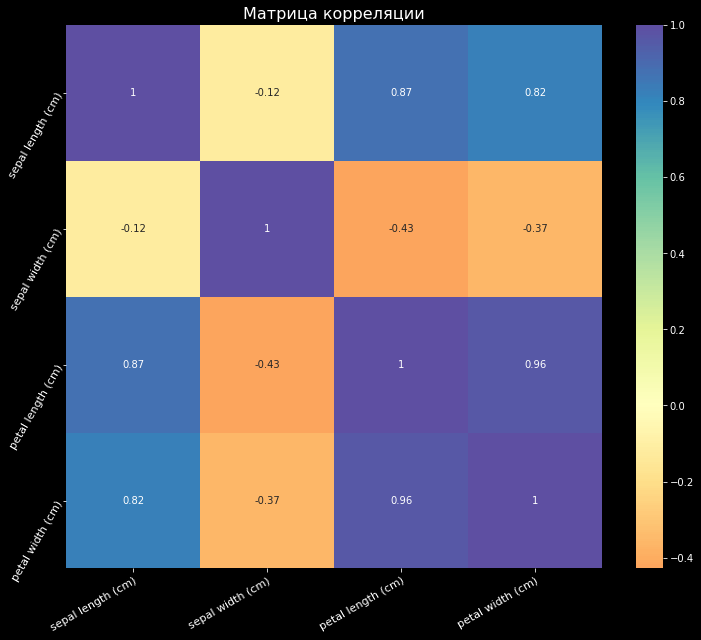

In [185]:
# тепловой график корреляции seaborn
plt.figure(figsize=(12, 10))

sns.heatmap(iris_df.corr(), xticklabels=iris_df.corr().columns, yticklabels=iris_df.corr().columns, cmap='Spectral', center=0, annot=True)

plt.title('Матрица корреляции', fontsize=16)
plt.xticks(rotation=30, ha='right', rotation_mode='anchor', fontsize=11)
plt.yticks(rotation=60, ha='right', rotation_mode='anchor', fontsize=11)

plt.show()

### *Часть 2. Seaborn*

### **Задача 4**

*2 балла*

Для датасета Occupancy (datatraining.txt) постройте диаграмму присутствия в разбивке по часам и меткам классов *(метки классов хранятся в столбце 'occupancy)'*. Для этого сделайте следующее:
*   создайте новый столбец "hour", отвечающий соответствующему часу, 
*   нарисуйте sns.countplot этого столбца в разбивке по Occupancy.

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### **Решение:**

In [4]:
# загружаем dataset
occupancy_df = pd.read_csv('Data/datatraining.txt')
occupancy_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [49]:
# создаем колонку hour
occupancy_df['Hour'] = pd.to_datetime(occupancy_df['date']).dt.hour
occupancy_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hour
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,17
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,17
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,17
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,17
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,17


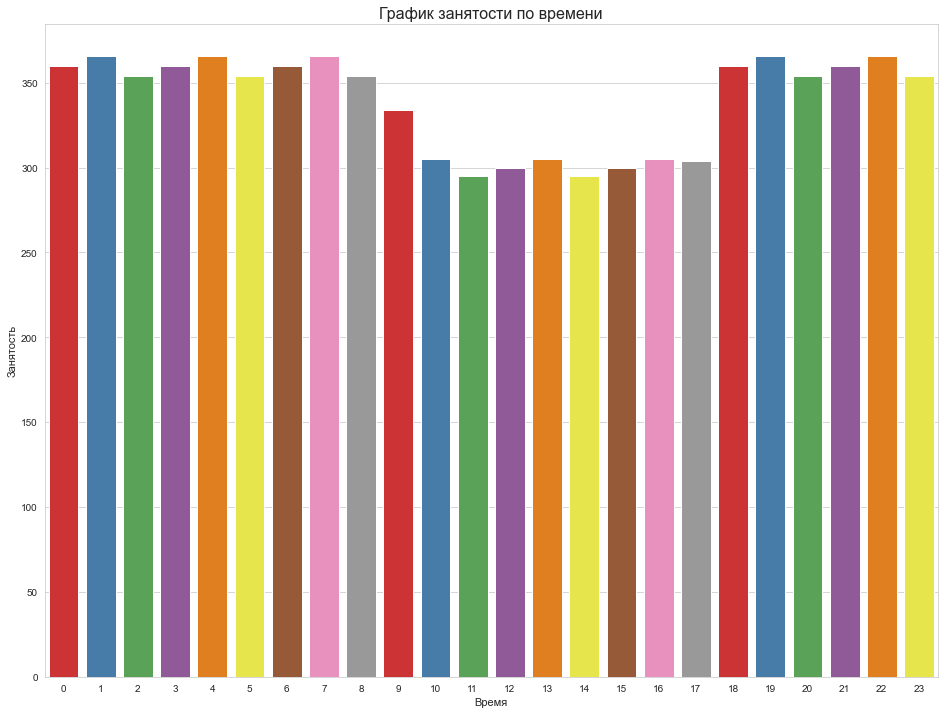

In [50]:
# нарисуйте sns.countplot этого столбца в разбивке по Occupancy
sns.set_style('whitegrid')
plt.figure(figsize=(16, 12))

ax = sns.countplot(x=occupancy_df.Hour, data=occupancy_df.Occupancy, palette="Set1")
plt.title('График занятости по времени', fontsize=16)
plt.xlabel('Время', fontsize=11)
plt.ylabel('Занятость', fontsize=11)

plt.show()

### **Задача 5**

*2 балла*

Сделайте resample данных по получасовому интервалу с использованием усреднения для всех признаков.

Постройте sns.jointplot между признаками Light и CO2.

### **Решение:**

In [5]:
# создаем DataTime index
occupancy_df.index = pd.to_datetime(occupancy_df.date)
occupancy_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-04 17:51:00,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [53]:
# удаляем колонку date
occupancy_df.drop('date', axis=1)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hour
date,,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1,17
2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1,17
2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1,17
2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1,17
2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1,17
...,...,...,...,...,...,...,...
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1,9
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1,9
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1,9


In [54]:
# ресемплируем по 30 минут с усреднением
occupancy_df.resample('30min').mean()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hour
date,,,,,,,
2015-02-04 17:30:00,23.125556,27.220500,423.277778,705.833333,0.004768,1.000000,17.0
2015-02-04 18:00:00,22.838763,27.369892,94.596774,679.771505,0.004711,0.225806,18.0
2015-02-04 18:30:00,22.399655,27.407931,0.000000,630.025862,0.004593,0.000000,18.0
2015-02-04 19:00:00,22.179528,27.246000,0.000000,589.516667,0.004504,0.000000,19.0
2015-02-04 19:30:00,21.954274,27.118280,0.000000,555.833333,0.004422,0.000000,19.0
...,...,...,...,...,...,...,...
2015-02-10 07:30:00,20.303172,33.028306,0.000000,452.177419,0.004869,0.000000,7.0
2015-02-10 08:00:00,20.295172,33.123506,0.000000,452.626437,0.004881,0.000000,8.0
2015-02-10 08:30:00,20.411611,33.508556,310.088889,483.788889,0.004974,0.666667,8.0


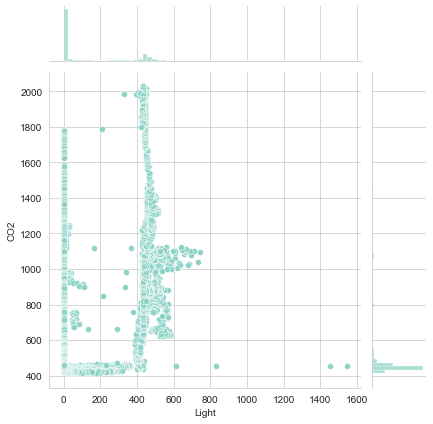

In [58]:
# sns.jointplot между признаками Light и CO2.
sns.jointplot(data=occupancy_df, x=occupancy_df.Light, y=occupancy_df.CO2)

#sns.jointplot(data=occupancy_df, x=occupancy_df.iloc[:,3], y=occupancy_df.iloc[:,4]) # вариант с указанием индексов
plt.show()